(1) (2 points) Create a barchart that shows the overall valuation of the unicorn industries. (use
plt.barh() to create a horizontal barchart. It takes the same arguments as plt.bar()). The color for
the ‘Big Data’ bar is ‘deepskyblue’, and the rest of the bars is ‘lightgray’. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset1=pd.read_csv('unicorn.csv')

In [3]:
dataset1.head()

,Company,Valuation,DateJoined,Country,Industry,SelectedInvestors
0,Toutiao (Bytedance),$75,4/7/17,China,Digital Media/ AI,"Sequoia Capital China, SIG Asia Investments, S..."
1,Uber,$72,8/23/13,USA,On-Demand,"Lowercase Capital,\n\t Benchmark Capital, Goo..."
2,Didi Chuxing,$56,12/31/14,China,On-Demand,"Matrix Partners, Tiger\n\t Global Management,..."
3,WeWork,$47,2/3/14,USA,Facilities,"T. Rowe Price, Benchmark\n\t Capital, SoftBan..."
4,JUUL Labs,$38,12/20/17,USA,Consumer Electronics,Tiger Global Management


In [11]:
dataset1['Valuation']=pd.to_numeric(dataset1.Valuation.str.replace('$',''))

In [16]:
industries=dataset1.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)

In [17]:
industries

Industry
On-Demand                       163.20
Fintech                         105.04
eCommerce/Marketplace            88.46
Digital Media/ AI                75.00
Internet Software & Services     69.64
                                 ...  
InsurTech                         1.00
Health & Wellness                 1.00
Digital Media                     1.00
Digital health                    1.00
ecommerce                         1.00
Name: Valuation, Length: 107, dtype: float64

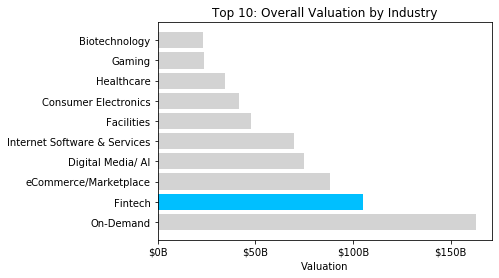

In [50]:
Top10=industries[:10]
colors=['lightgray']+['deepskyblue']+['lightgray']*8

plt.barh(Top10.index,Top10,color=colors)
plt.title('Top 10: Overall Valuation by Industry')
plt.xlabel('Valuation')
plt.xticks([0,50,100,150])
ax=plt.gca()
ax.set_xticklabels(['$0B','$50B','$100B','$150B'])
plt.show()

(2) (2 points) Create a Choropleth map that shows the location of the volcanoes in the USA. The
color intensity of the dots on the map represent the elevation of these volcanoes. (Use cmap =
‘Reds’ for the color shades of elevation, and color = ‘deepskyblue’ for the base map of the
USA)

In [29]:
import geopandas as gpd
from shapely.geometry import Point

In [26]:
usa=gpd.read_file('us-states.json')

In [28]:
volcano=pd.read_csv('Volcanoes_USA.csv')
volcano

,VOLCANX020,NUMBER,NAME,LOCATION,STATUS,ELEV,TYPE,TIMEFRAME,LAT,LON
0,509,1201-01=,Baker,US-Washington,Historical,3285,Stratovolcanoes,D3,48.776798,-121.810997
1,511,1201-02-,Glacier Peak,US-Washington,Tephrochronology,3213,Stratovolcano,D4,48.111801,-121.111000
2,513,1201-03-,Rainier,US-Washington,Dendrochronology,4392,Stratovolcano,D3,46.869801,-121.751000
3,515,1201-05-,St. Helens,US-Washington,Historical,2549,Stratovolcano,D1,46.199799,-122.181000
4,516,1201-04-,Adams,US-Washington,Tephrochronology,3742,Stratovolcano,D6,46.205799,-121.490997
...,...,...,...,...,...,...,...,...,...,...
57,580,1210-03-,Valles Caldera,US-New Mexico,Pleistocene-Fumarolic,3430,Caldera,Q,35.869999,-106.570999
58,581,1209-02-,Sunset Crater,US-Arizona,Dendrochronology,2447,Cinder cone,D6,35.369999,-111.501000
59,584,1203-20-,Amboy,US-California,Holocene,288,Cinder cone,U,34.549999,-115.780998
60,586,1210-02-,Zuni-Bandera,US-New Mexico,Anthropology,2550,Volcanic field,D7,34.799999,-108.001000


In [31]:
volcano['coordinate']=volcano[['LON','LAT']].values.tolist()
volcano['coordinate']=volcano['coordinate'].apply(Point)
volcano=gpd.GeoDataFrame(volcano,geometry='coordinate')

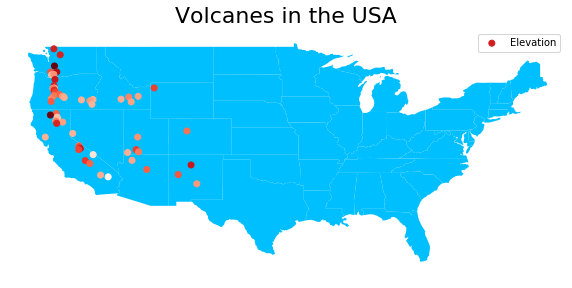

In [45]:
plt.figure(figsize=(10,7))
ax=plt.gca()

base=usa.plot(ax=ax,color='deepskyblue')
volcano.plot(ax=base,column='ELEV',cmap='Reds',label='Elevation')
plt.legend(loc='upper right')
plt.title('Volcanes in the USA',size=22)
plt.xlim((-127,-65))
plt.ylim((23,51))
plt.axis('off')
plt.show()

(3) (2 points) How much did Joey owe Chandler?

In [53]:
with open('friends.txt','r') as file:
    friends=file.read()

In [54]:
friends

"Joey says that there were 2 sets of head shots which cost $1000. Let's assume that the acting lessons, dancing lessons, and voice coach sessions were all one thousand on average. So now we're at $4000. He then says 3 years worth of rent, utilities, and food. They live in Manhattan in a nice area of The Village, in a 2 bedroom, 1 bath, apartment on one of the upper levels. That is a very expensive location to live in; today an apartment like that would cost around five thousand dollars a month easily, using Zillow.com as a guide (and I'm low balling it assuming they got a good deal). Using an online dollar appreciation site, and using the year 1997, i found that five thousand would translate too about three thousand and five hundred dollars (*Edit: which after researching was actually their monthly rent that was actually mentioned in the show, so spot on) for them. The rent was supposed to be split 2 ways, so this is 3 years of chandler paying Joey's one thousand two hundred and fifty 

In [55]:
import re

In [58]:
spending=re.findall(r'\$[0-9]*',friends)

In [60]:
total_owed=sum([pd.to_numeric(i[1:]) for i in spending])

In [62]:
spending

['$1000', '$4000', '$45000', '$1500', '$1260', '$39000']

In [61]:
total_owed

91760

(4) (2 points) Read the datasciecne_internships.csv file and show the top 10 cities in California with
the most internships in data science as follows. The color of the top 3 cities with most
internships is “firebrick” and the rest are “grey”. The width of the line bars is 5, and the alpha
level of these line bars is 0.7.

In [64]:
intern=pd.read_csv('datascience_internships.csv')
intern.head()

,company,position,location,job_url
0,Salusive Health,Software Development / Data Science Internship,Palo Alto,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,SoFi,Data Science Intern,San Francisco,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,Esurance,Data Science Intern,San Francisco,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,GoGuardian,Data Infrastructure Engineer,El Segundo,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,Ticketmaster,"Intern, Data Science (Summer 2020)",Hollywood,https://www.indeed.com/rc/clk?jk=6eecb3d1932cd...


In [83]:
cities=intern.groupby('location')['position'].count().sort_values()

In [84]:
city10=cities[-10:]

Text(0.5, 0, 'Number of Internships')

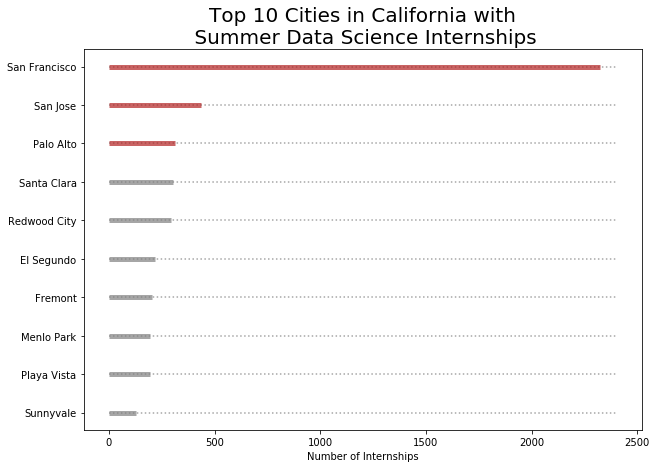

In [100]:
colors=['grey']*7+['firebrick']*3

plt.figure(figsize=(10,7))
plt.hlines(city10.index,xmin=0,xmax=2400,color='grey',linestyles=':',alpha=0.7)
plt.hlines(city10.index,xmin=0,xmax=city10,color=colors,linewidth=5,alpha=0.7)
plt.title('Top 10 Cities in California with\n Summer Data Science Internships',size=20)
plt.xlabel('Number of Internships')

(5) (2 points) Use the following link to scrape and extract for each position the company name,
company location, job title, and job description link.
Link: https://www.indeed.com/jobs?q=data+science+intern&l=California

In [103]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [177]:
html=urlopen('https://www.indeed.com/jobs?q=data+science+intern&l=California')

In [178]:
soup=BeautifulSoup(html)

In [179]:
titles=soup.find_all('div',{'class':'title'})

In [180]:
titlename=[]

for name in titles:
    titlename.append(name.get_text().replace('\n',''))

In [181]:
titlename

['Postdoctoral Scholar for Multimodal Machine Learning and Nat...',
 'Data Science - Summer Intern',
 'Intern, Data Science (Summer 2020)',
 'Data Science Intern',
 'Business Intelligence Data Science Intern, Motion Pictures F...',
 'Data Science Intern for I-Bank - NLP & Predictive Analytics',
 'Data Science Intern',
 'ML/Data Science Intern (Summer 2020)',
 'Data Science Intern - Summer 2020',
 'Data Science Intern - Gaming',
 'Amplify Summer 2020 - Data Scientist Intern']

In [182]:
companies=soup.find_all('span',{'class':'company'})

In [183]:
companyname=[]

for name in companies:
    companyname.append(name.get_text().replace('\n',''))

In [184]:
companyname

['Institute for Creative Technologies',
 'OpenX',
 'Ticketmaster',
 'Retina AI',
 'Sony Pictures Entertainment, Inc.',
 'Helm Capital',
 'Twitch',
 'Splunk',
 'Cox Automotive',
 'NVIDIA',
 'City National Bank']

In [198]:
locations_div=soup.find_all('div',{'class':'location accessible-contrast-color-location'})
locations_span=soup.find_all('span',{'class':'location accessible-contrast-color-location'})

In [199]:
locname=[]

for name in locations_div:
    locname.append(name.get_text())
    
for name in locations_span:
    locname.append(name.get_text())

In [200]:
locname

['Playa Vista, CA',
 'Los Angeles, CA',
 'Hollywood, CA 90028',
 'Santa Monica, CA',
 'Culver City, CA 90232',
 'Santa Monica, CA',
 'San Francisco, CA 94104 (Financial District area)',
 'San Francisco, CA',
 'Irvine, CA 92618',
 'Santa Clara, CA',
 'Los Angeles, CA']

In [195]:
links=soup.find_all('div',{'class':'title'})

In [196]:
linknames=[]

for name in links:
    linknames.append(name.findChild('a')['href'])

In [197]:
linknames

['/pagead/clk?mo=r&ad=-6NYlbfkN0AbcLYJH6EEU2hhfUhIe4V-wtZUPXOEfJh72XLwlGjJwXW5GoFa_FpEwXnUioyetHTuGPE6o7_OHivZBQLgqDrF3jxxhu4ieZVBPjftf8yJfurwUfMjkYepwM_YEhvqkSalSUc8G4mbKK1qEPgjVMnal49V_9bNBS0nOMj_n0Y-kS0peVqeFyGqajLRmAHd6NyK3cRy9nP2m_tEumL6386DqSxGAOI1Y6cf7E-M631UwfSqDIY3_aZVgLCkLKDFBpLY3UH7Nz7nBNPO9EJ1eitlEbQWRneCjK99EZOtWsZgTqKi7ErL_5JR7iv8067Q3XykFiOCw0V5WsaMJ7BXhx-uoCzdLRH1BXFMctCODKjD5bHwHMgsUa2D1Tf71-s62RlikQsJKIb3BQh1vHqCtAtQqhPYMptEmDquUOKqnkevfQ==&p=0&fvj=0&vjs=3',
 '/rc/clk?jk=37fec60b919bc9eb&fccid=536f99c1c2da7f57&vjs=3',
 '/rc/clk?jk=6eecb3d1932cd55e&fccid=31696df7c99497fd&vjs=3',
 '/rc/clk?jk=c8027d26e43b6dd9&fccid=6c77b12b3695d0e0&vjs=3',
 '/rc/clk?jk=2cb0b85c7e6e7432&fccid=87296c430fc584e1&vjs=3',
 '/company/Helm-Capital/jobs/Data-Science-Intern-Bank-bf2022b03a1f1e9a?fccid=7618ffd5d857e76a&vjs=3',
 '/rc/clk?jk=ec88c85703fdb3ce&fccid=e21f6affbb4bb0b2&vjs=3',
 '/rc/clk?jk=9042480af958a610&fccid=aef928e89977f7f0&vjs=3',
 '/rc/clk?jk=91bb786ec49fdad7&fccid=7e465a3d521b3ac

In [142]:
emx['href']

'/pagead/clk?mo=r&ad=-6NYlbfkN0CZXd4cJvEv79SO4_SS2kwCEvpViN3o8ch1Jvhx23LOYZSEEqjIOLGZ8M9TWnfpvuNV9hcbCxpCCFpVb6Ohyhw-JovwoTKhpai3qVYb4s8jKWhOiXPYTuQdlRI1whDrzGW2Gf-gfGCMsJgGrDTT_6HSmy65ghEJO_1K1HefpjkXw9ZZBR_m1DntXu6Cx8PmPbLakKdKGoDqcz5_3jrbQIfnBvQaS-22KlRBAPBrtlDpWPLU2r3qm6pHqPZ5GnC0lOffPZXhRipHvwHW-NN42sMrhVGLR5ZRo97Pz2_jxyjPzzwhrk8G0XOMNIq1JHaqJyVT08ahuoMyzVFo9GX0DS6QvhAyLMFPmODy9xIj5ALk8ClSxWqeO9TCBHiy9_Yk0jdJujmEkBbYFVYq_9zvHRTQ2yHl_GnOZIlJiGiCwFyknL-bE6MVZIv9SChS6Zkjc_8v1tDDJcwkmVJPrGlfn4jH&p=1&fvj=1&vjs=3'

KeyError: 'href'

In [148]:
len(linknames)

14

In [149]:
len(titles)

14

In [152]:
len(locations)

10

In [174]:
links[1].find_all('span',{'class':'location accessible-contrast-color-location'})

[]

<div class="title">
<a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/rc/clk?jk=6eecb3d1932cd55e&amp;fccid=31696df7c99497fd&amp;vjs=3" id="jl_6eecb3d1932cd55e" onclick="setRefineByCookie([]); return rclk(this,jobmap[1],true,0);" onmousedown="return rclk(this,jobmap[1],0);" rel="noopener nofollow" target="_blank" title="Intern, Data Science (Summer 2020)">
<b>Intern</b>, <b>Data</b> <b>Science</b> (Summer 2020)</a>
</div>

In [201]:
Jobtable=pd.DataFrame({'Company Name':companyname,'Job Name':titlename,'Location':locname,'Link':linknames})

In [202]:
Jobtable

,Company Name,Job Name,Location,Link
0,Institute for Creative Technologies,Postdoctoral Scholar for Multimodal Machine Le...,"Playa Vista, CA",/pagead/clk?mo=r&ad=-6NYlbfkN0AbcLYJH6EEU2hhfU...
1,OpenX,Data Science - Summer Intern,"Los Angeles, CA",/rc/clk?jk=37fec60b919bc9eb&fccid=536f99c1c2da...
2,Ticketmaster,"Intern, Data Science (Summer 2020)","Hollywood, CA 90028",/rc/clk?jk=6eecb3d1932cd55e&fccid=31696df7c994...
3,Retina AI,Data Science Intern,"Santa Monica, CA",/rc/clk?jk=c8027d26e43b6dd9&fccid=6c77b12b3695...
4,"Sony Pictures Entertainment, Inc.","Business Intelligence Data Science Intern, Mot...","Culver City, CA 90232",/rc/clk?jk=2cb0b85c7e6e7432&fccid=87296c430fc5...
5,Helm Capital,Data Science Intern for I-Bank - NLP & Predict...,"Santa Monica, CA",/company/Helm-Capital/jobs/Data-Science-Intern...
6,Twitch,Data Science Intern,"San Francisco, CA 94104 (Financial District area)",/rc/clk?jk=ec88c85703fdb3ce&fccid=e21f6affbb4b...
7,Splunk,ML/Data Science Intern (Summer 2020),"San Francisco, CA",/rc/clk?jk=9042480af958a610&fccid=aef928e89977...
8,Cox Automotive,Data Science Intern - Summer 2020,"Irvine, CA 92618",/rc/clk?jk=91bb786ec49fdad7&fccid=7e465a3d521b...
9,NVIDIA,Data Science Intern - Gaming,"Santa Clara, CA",/rc/clk?jk=d242e8e10d1c2355&fccid=c267f29f0f85...


In [247]:
loc=soup.find_all('div',{'class':'sjcl'})

In [262]:
locnames=[]
for name in loc:
    texting=name.find_all('span',{'class':'location accessible-contrast-color-location'})
    if len(texting)==0:
        texting=name.find_all('div',{'class':'location accessible-contrast-color-location'})[0].text
        locnames.append(texting)
    else:
        locnames.append(texting[0].text)

In [263]:
locnames

['Playa Vista, CA',
 'Los Angeles, CA',
 'Hollywood, CA 90028',
 'Santa Monica, CA',
 'Culver City, CA 90232',
 'Santa Monica, CA',
 'San Francisco, CA 94104 (Financial District area)',
 'San Francisco, CA',
 'Irvine, CA 92618',
 'Santa Clara, CA',
 'Los Angeles, CA']

In [236]:
loc[1].find('span',{'class':'location accessible-contrast-color-location'}).text

'Los Angeles, CA'

In [221]:
text=loc[1].find('span',{'class':'location accessible-contrast-color-location'}).text

In [227]:
locnames[0]

<div class="location accessible-contrast-color-location">Playa Vista, CA</div>

In [239]:
type(loc[1].find('span',{'class':'location accessible-contrast-color-location'}))

bs4.element.Tag

In [242]:
for name in loc:
    texting=name.find('span',{'class':'location accessible-contrast-color-location'})

In [245]:
texting.text

'Los Angeles, CA'

In [259]:
[name.find_all('span',{'class':'location accessible-contrast-color-location'}) for name in loc]

[[],
 [<span class="location accessible-contrast-color-location">Los Angeles, CA</span>],
 [<span class="location accessible-contrast-color-location">Hollywood, CA 90028</span>],
 [<span class="location accessible-contrast-color-location">Santa Monica, CA</span>],
 [<span class="location accessible-contrast-color-location">Culver City, CA 90232</span>],
 [<span class="location accessible-contrast-color-location">Santa Monica, CA</span>],
 [<span class="location accessible-contrast-color-location">San Francisco, CA 94104 <span style="font-size: smaller">(Financial District area)</span></span>],
 [<span class="location accessible-contrast-color-location">San Francisco, CA</span>],
 [<span class="location accessible-contrast-color-location">Irvine, CA 92618</span>],
 [<span class="location accessible-contrast-color-location">Santa Clara, CA</span>],
 [<span class="location accessible-contrast-color-location">Los Angeles, CA</span>]]

In [256]:
type(loc[1].text)

str